#### Dataset

In [1]:
# Social_Network_Ads.csv
# Location: https://mitu.co.in/dataset

#### Import necessary Libraries

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the dataset

In [54]:
df = pd.read_csv('datasets/Social_Network_Ads.csv')

In [55]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


#### Separate the input and output variables

In [56]:
x = df[['Age','EstimatedSalary']]
y = df['Purchased']

In [57]:
x

,Age,EstimatedSalary
0,19.0,19000.0
1,35.0,20000.0
2,26.0,43000.0
3,27.0,57000.0
4,19.0,76000.0
...,...,...
395,46.0,41000.0
396,51.0,23000.0
397,50.0,20000.0
398,36.0,33000.0


In [58]:
x.describe()

,Age,EstimatedSalary
count,400.000000,400.000000
mean,37.655000,69742.500000
std,10.482877,34096.960282
min,18.000000,15000.000000
25%,29.750000,43000.000000
50%,37.000000,70000.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

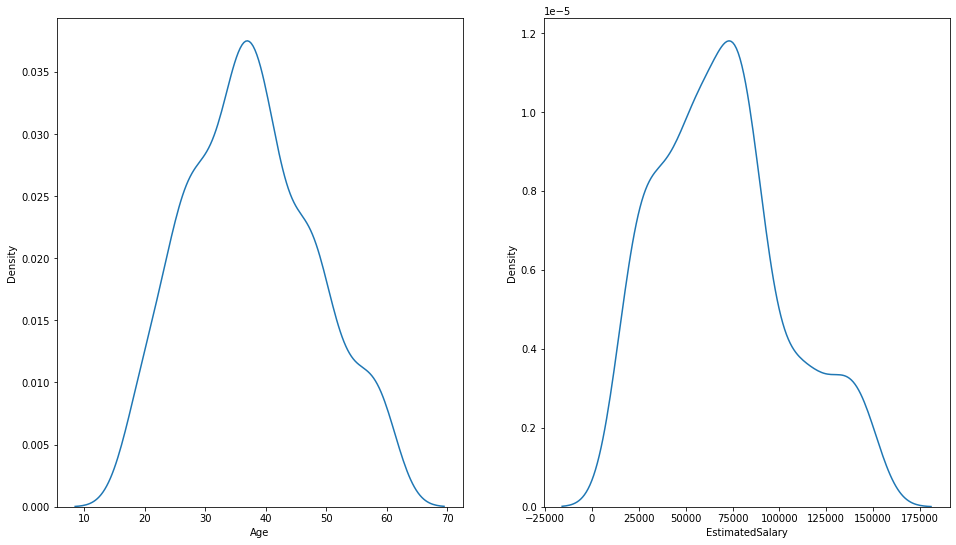

In [59]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
sns.kdeplot(x['Age'])
plt.subplot(1,2,2)
sns.kdeplot(x['EstimatedSalary'])

In [60]:
set(y)

{0, 1}

In [61]:
np.unique(y)

array([0, 1])

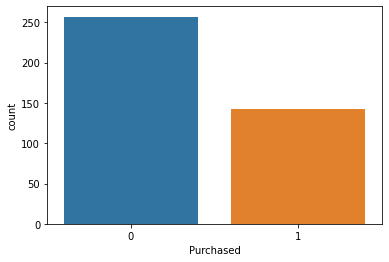

In [62]:
sns.countplot(x=y);

In [63]:
y.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [64]:
from collections import Counter
Counter(y)

Counter({0: 257, 1: 143})

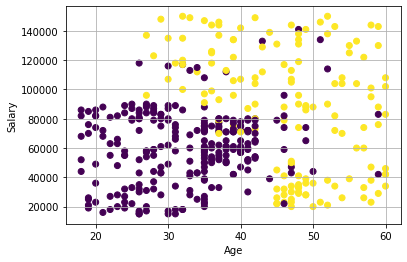

In [65]:
plt.xlabel('Age')
plt.ylabel('Salary')
plt.grid()
plt.scatter(x['Age'], x['EstimatedSalary'], c=y)

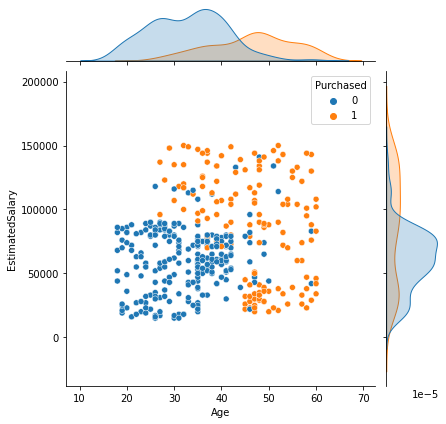

In [66]:
sns.jointplot(x='Age', y='EstimatedSalary', 
              hue='Purchased', data=df)

#### cross-validation

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, random_state=0, test_size=0.25)

In [69]:
x_train.shape

(300, 2)

In [70]:
x_test.shape

(100, 2)

#### Build the decision tree model

In [71]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
dt = DecisionTreeClassifier(random_state=0, criterion='entropy')

In [74]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

#### Draw the tree

In [75]:
from sklearn.tree import plot_tree

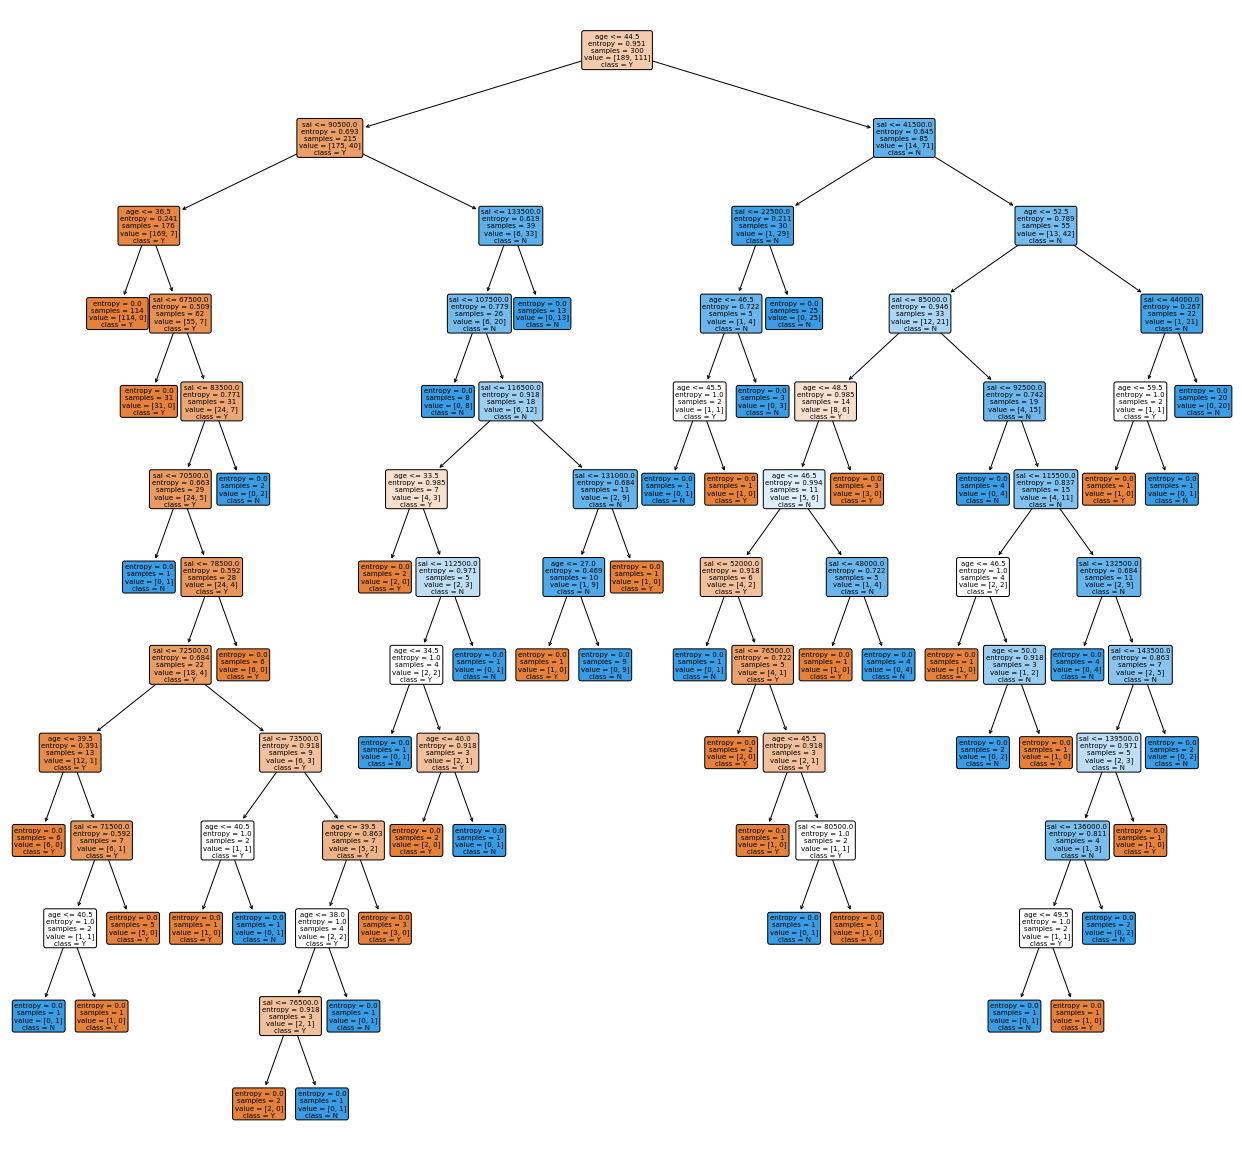

In [76]:
plt.figure(figsize=(22,21))
plot_tree(dt, fontsize=7, filled=True, rounded=True,
          feature_names=['age','sal'], class_names=['Y','N']);
plt.savefig('mytree.png')

In [77]:
x_test

,Age,EstimatedSalary
132,30.0,87000.0
309,38.0,50000.0
341,35.0,75000.0
196,30.0,79000.0
246,35.0,50000.0
...,...,...
146,27.0,96000.0
135,23.0,63000.0
390,48.0,33000.0
264,48.0,90000.0


#### Performance Evaluation

In [78]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [79]:
y_test.value_counts()

0    68
1    32
Name: Purchased, dtype: int64

In [80]:
y_pred = dt.predict(x_test)

In [81]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1])

In [82]:
result = pd.DataFrame({
    'actual': y_test,
    'predicted': y_pred
})

In [83]:
result

,actual,predicted
132,0,0
309,0,0
341,0,0
196,0,0
246,0,0
...,...,...
146,1,1
135,0,0
390,1,1
264,1,1


In [84]:
confusion_matrix(y_test, y_pred)

array([[62,  6],
       [ 3, 29]])

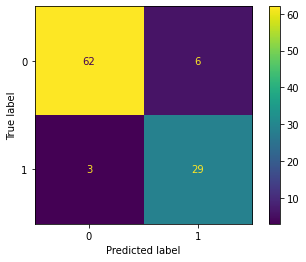

In [85]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [86]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        68
           1       0.83      0.91      0.87        32

    accuracy                           0.91       100
   macro avg       0.89      0.91      0.90       100
weighted avg       0.91      0.91      0.91       100



In [36]:
# recall of class - 0 / sensitivity of algorithm
r0 = 62/68
r0

0.9117647058823529

In [37]:
# recall of class - 1 / specificity of algorithm
r1 = 28/32
r1

0.875

In [38]:
pd.Series(y_pred).value_counts()

0    66
1    34
dtype: int64

In [39]:
# precision of class=0 / Positive Predictive Value
p0 = 62/66
p0

0.9393939393939394

In [40]:
# precision of class=1 / Negative Predictive Value
p1 = 28/34
p1

0.8235294117647058

In [44]:
# Harmonic mean
f0 = (2 *p0 *r0) / (p0+r0)
f0

0.9253731343283583

In [43]:
f1 = (2 *p1 *r1) / (p1+r1)
f1

0.8484848484848485

In [46]:
accuracy_score(y_test, y_pred)

0.9

In [47]:
dt.feature_importances_

array([0.49155481, 0.50844519])

In [48]:
new = pd.DataFrame({
    'Age': [56,23,45],
    'EstimatedSalary': [134000,36000,57800]
})

In [49]:
new

,Age,EstimatedSalary
0,56,134000
1,23,36000
2,45,57800


In [50]:
dt.predict(new)

array([1, 0, 0])

In [52]:
# banknotes.csv
# petrol_consumption.csv